Plots to show robustness of ResidualAmplitude vs Amplitude in detecting peaks

In [1]:
import sys
sys.path.append("../../")

In [30]:
from measureEccentricity.measureEccentricity import measure_eccentricity
from measureEccentricity.load_data import load_waveform
from measureEccentricity.plot_settings import use_fancy_plotsettings, colorsDict, figWidthsOneColDict
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# We choose a waveform that has eccentricity

In [24]:
filepath = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0011481056_Momega00.010.h5"
filepath_zeroecc = "../../data/ecc_waveforms/Non-Precessing/EOB/EccTest_q4.00_chi1z-0.60_chi2z-0.60_EOBecc0.0000000000_Momega00.002.h5"

In [25]:
waveform_kwargs = {"filepath": filepath,
                   "filepath_zero_ecc": filepath_zeroecc,
                   "include_zero_ecc": True}

In [26]:
dataDict = load_waveform("EOB", **waveform_kwargs)

In [27]:
tref_in = dataDict["t"]

In [28]:
journal = "APS"
use_fancy_plotsettings(journal=journal)

In [69]:
markers = {"Amplitude": ".",
          "ResidualAmplitude": "."}

/home1/md.shaikh/Eccentricity/paper/plot_scripts/../../measureEccentricity/eccDefinition.py:421: UserWarning: Ecc(t) is non monotonic.
  warnings.warn("Ecc(t) is non monotonic.")


(<matplotlib.patches.Rectangle at 0x7f08152c6d60>,
 (<matplotlib.patches.ConnectionPatch at 0x7f0814c710d0>,
  <matplotlib.patches.ConnectionPatch at 0x7f0814c71a60>))

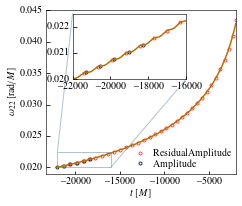

In [133]:
fig, ax = plt.subplots(figsize=(figWidthsOneColDict[journal], 3))
axins = ax.inset_axes([0.14, 0.58, 0.6, 0.4])
for method in ["ResidualAmplitude", "Amplitude"]:
    tref, ecc, meanAno, eccMethod = measure_eccentricity(tref_in=tref_in,
                                                        dataDict=dataDict,
                                                        method=method,
                                                        return_ecc_method=True)
    ax.plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], label=method, mfc="none", marker=markers[method], ls="")
    axins.plot(eccMethod.t[eccMethod.peaks_location], eccMethod.omega22[eccMethod.peaks_location], mfc="none", marker=markers[method], ls="")
ax.plot(eccMethod.t, eccMethod.omega22)
ax.legend(loc="lower right", handlelength=1, labelspacing=0.1, borderaxespad=0.1)
ax.set_xlim(right=-2000)
ax.set_ylim(0.019, 0.045)
ax.set_xlabel(r"$t$ [$M$]")
ax.set_ylabel(r"$\omega_{22}$ [rad/$M$]")

axins.plot(eccMethod.t, eccMethod.omega22)
axins.set_xlim(left=-22000, right=-16000)
axins.set_ylim(0.020, 0.0225)
ax.indicate_inset_zoom(axins, edgecolor=colorsDict["apastron"])

In [134]:
fig.subplots_adjust(left=0.17, bottom=0.13, right=0.98, top=0.98)
fig.savefig("../figs/amp_vs_res_amp.pdf")